In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import mlflow
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from pycaret.regression import setup, compare_models, plot_model, finalize_model, evaluate_model

from lib.reproduction import major_oxides

In [8]:
from lib import full_flow_dataloader
from lib.config import AppConfig

mlflow.set_tracking_uri(AppConfig().mlflow_tracking_uri)

drop_cols = ["ID", "Sample Name"]

train_processed, test_processed = full_flow_dataloader.load_full_flow_data(load_cache_if_exits=True, average_shots=False)
target = major_oxides[0]

drop_cols.extend([oxide for oxide in major_oxides if oxide != target])
train_processed = train_processed.drop(columns=drop_cols)
test_processed = test_processed.drop(columns=drop_cols)


In [13]:
train_processed.head()

,240.811,240.86501,240.918,240.972,241.02699,241.07899,241.133,241.188,241.24001,241.29401,...,904.03003,904.22302,904.41602,904.60889,904.80188,904.99481,905.18768,905.38062,905.57349,SiO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13


In [14]:
test_processed.head()

,240.811,240.86501,240.918,240.972,241.02699,241.07899,241.133,241.188,241.24001,241.29401,...,904.03003,904.22302,904.41602,904.60889,904.80188,904.99481,905.18768,905.38062,905.57349,SiO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43


In [16]:
regression_setup = setup(
    data=train_processed, target=target, session_id=123,
    log_experiment=True, experiment_name="Pycaret",
    log_plots=True, log_data=True, test_data=test_processed,
    index=False
)

,Description,Value
0,Session id,123
1,Target,SiO2
2,Target type,Regression
3,Original data shape,"(1928, 6145)"
4,Transformed data shape,"(1928, 6145)"
5,Transformed train set shape,"(1538, 6145)"
6,Transformed test set shape,"(390, 6145)"
7,Numeric features,6144
8,Preprocess,True
9,Imputation type,simple


In [17]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:30:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.4861,31.4281,5.2432,0.8781,0.1729,0.2474,16.4340
rf,Random Forest Regressor,3.6584,33.5369,5.4108,0.8713,0.1646,0.2680,54.2980
gbr,Gradient Boosting Regressor,3.6022,34.0928,5.4635,0.8682,0.1727,0.2090,24.4090
llar,Lasso Least Angle Regression,3.7212,35.0387,5.7585,0.8459,0.2106,0.4647,0.3860
ada,AdaBoost Regressor,4.5741,44.2991,6.4064,0.8165,0.2337,0.7223,8.9960
lasso,Lasso Regression,4.8020,53.1382,6.9071,0.7889,0.2413,0.5323,1.2120
en,Elastic Net,4.8019,53.1382,6.9071,0.7889,0.2413,0.5323,0.9790
ridge,Ridge Regression,4.3278,54.0458,6.9264,0.7846,0.2737,0.8218,0.4980
huber,Huber Regressor,4.7204,50.8987,7.0093,0.7759,0.2441,0.8274,5.6490
lr,Linear Regression,5.0998,59.0478,7.2509,0.7659,0.3138,1.1191,1.4260


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

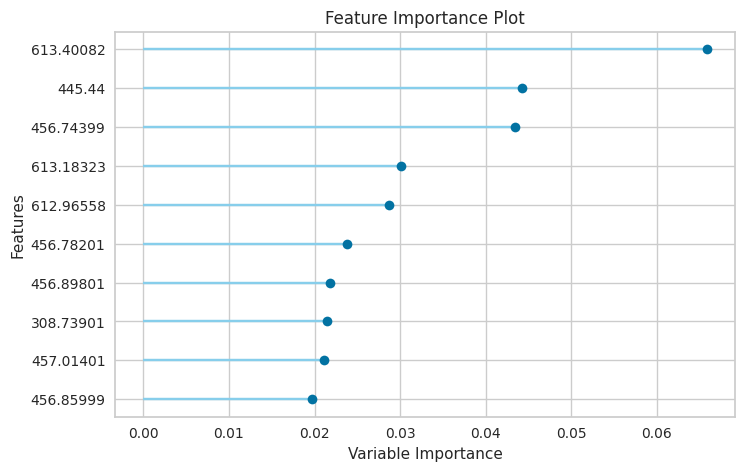

In [12]:
plot_model(best, plot = 'feature')

In [ ]:
final_best = finalize_model(best)